# dataset 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None


In [2]:
# 분석에 사용할 attribute 추출 'Person ID','Gender','Age','Occupation','Blood Pressure','Heart Rate'
x = data.drop(labels=['Person ID', 'Gender', 'Occupation', 'Blood Pressure'], axis=1)
x.head(1)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,27,6.1,6,42,6,Overweight,77,4200,None


# Attribute들 생성

In [3]:
# Is Sleep Disorder 생성
Is_Sleep_Disorder = ['']*374
for i in range(0, 374):
    if x['Sleep Disorder'][i] == 'None': Is_Sleep_Disorder[i] = 0
    else: Is_Sleep_Disorder[i] = 1

# Is Sleep Disorder 삽입
x = x.drop(labels=['Sleep Disorder'], axis=1)
x.insert(8, 'Is Sleep Disorder', Is_Sleep_Disorder)

x.head(1)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Is Sleep Disorder
0,27,6.1,6,42,6,Overweight,77,4200,0


In [4]:
# 새 Target 생성
new_Target = ['']*374
for i in range(0, 374):
    if x['BMI Category'][i] == 'Obese': new_Target[i] = "Overweight"
    elif x['BMI Category'][i] == 'Normal Weight': new_Target[i] = "Normal"
    else: new_Target[i] = x['BMI Category'][i]
        
# 새 target 삽입

x = x.drop(labels=['BMI Category'], axis=1)
x.insert(5, 'N BMI Category', new_Target)

x.head(1)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,N BMI Category,Heart Rate,Daily Steps,Is Sleep Disorder
0,27,6.1,6,42,6,Overweight,77,4200,0


In [5]:
# sleep index 생성
s_I = ['']*374
for i in range(0, 374):
    s_I[i] = float(x['Sleep Duration'][i]) * float(x['Quality of Sleep'][i])

# sleep index 삽입
x = x.drop(labels=['Sleep Duration', 'Quality of Sleep'], axis=1)
x.insert(1, 'Sleep Index', s_I)

x.head(1)

,Age,Sleep Index,Physical Activity Level,Stress Level,N BMI Category,Heart Rate,Daily Steps,Is Sleep Disorder
0,27,36.6,42,6,Overweight,77,4200,0


# Heatmap

In [6]:
import seaborn as sns

x_temp = x.copy(deep=True)

new_Target = ['']*374

for i in range(0, 374):
    if x_temp['N BMI Category'][i] == "Normal": new_Target[i] = 0
    else: new_Target[i] = 1
        
        

x_temp.insert(4, 'N N BMI Category', new_Target)
x_temp = x_temp.drop(labels=['N BMI Category'], axis=1)

x_temp.head(1)

,Age,Sleep Index,Physical Activity Level,Stress Level,N N BMI Category,Heart Rate,Daily Steps,Is Sleep Disorder
0,27,36.6,42,6,1,77,4200,0


In [7]:
x_temp.corr(numeric_only = True)

,Age,Sleep Index,Physical Activity Level,Stress Level,N N BMI Category,Heart Rate,Daily Steps,Is Sleep Disorder
Age,1.000000,0.460390,0.178993,-0.422344,0.501122,-0.225606,0.057973,0.432007
Sleep Index,0.460390,1.000000,0.189109,-0.885903,-0.337912,-0.607064,-0.023308,-0.317178
Physical Activity Level,0.178993,0.189109,1.000000,-0.034134,0.068685,0.136971,0.772723,0.069787
Stress Level,-0.422344,-0.885903,-0.034134,1.000000,0.165451,0.670026,0.186829,0.181685
N N BMI Category,0.501122,-0.337912,0.068685,0.165451,1.000000,0.336579,-0.042418,0.807842
Heart Rate,-0.225606,-0.607064,0.136971,0.670026,0.336579,1.000000,-0.030309,0.330254
Daily Steps,0.057973,-0.023308,0.772723,0.186829,-0.042418,-0.030309,1.000000,-0.026575
Is Sleep Disorder,0.432007,-0.317178,0.069787,0.181685,0.807842,0.330254,-0.026575,1.000000


<Axes: >

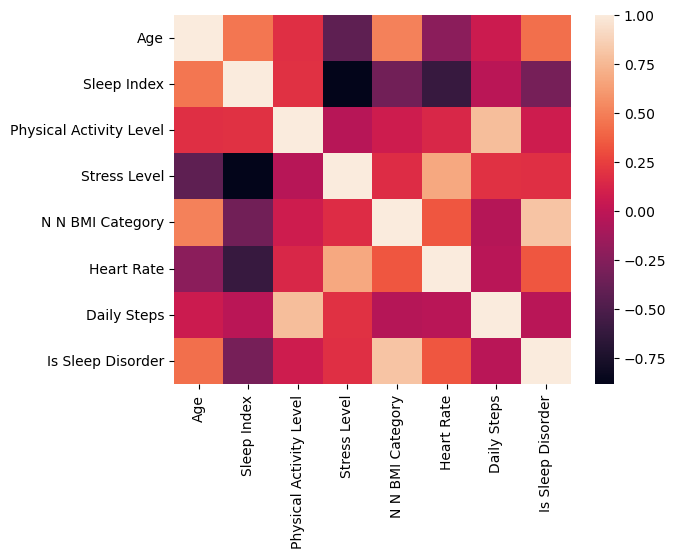

In [8]:
sns.heatmap(data = x_temp.corr(numeric_only = True))

# Barplot

In [9]:
import matplotlib.pyplot as plt

In [10]:
heatmap = x_temp.corr(numeric_only = True)['N N BMI Category']
heatmap = heatmap.sort_values(ascending=True)
heatmap = heatmap[:7]
heatmap

Sleep Index               -0.337912
Daily Steps               -0.042418
Physical Activity Level    0.068685
Stress Level               0.165451
Heart Rate                 0.336579
Age                        0.501122
Is Sleep Disorder          0.807842
Name: N N BMI Category, dtype: float64

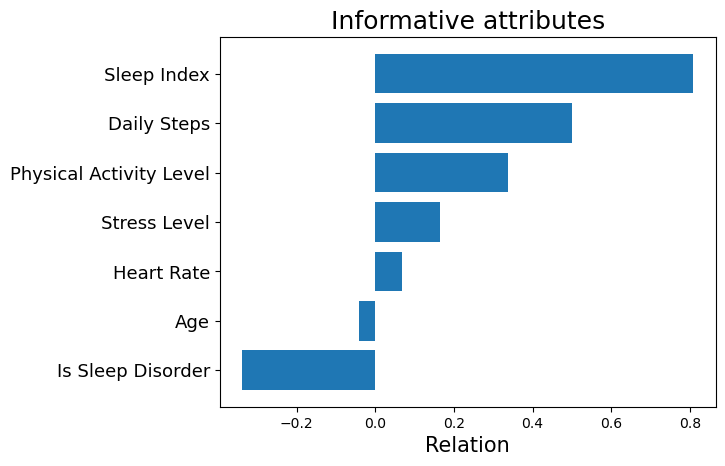

In [11]:
index = [1,2,3,4,5,6,7]
label = ['Is Sleep Disorder','Age','Heart Rate','Stress Level','Physical Activity Level','Daily Steps','Sleep Index']

plt.barh(index, heatmap)
plt.title('Informative attributes', fontsize=18)
# plt.ylabel('Attributes', fontsize=15)
plt.xlabel('Relation', fontsize=15)
plt.yticks(index, label, fontsize=13, rotation=0)
plt.show()

# Target 분리

In [12]:
y = pd.DataFrame(data=x, columns=['N BMI Category'])
x = x.drop(labels=['N BMI Category'], axis=1)

x.head(1)

,Age,Sleep Index,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Is Sleep Disorder
0,27,36.6,42,6,77,4200,0


In [13]:
y.head(1)

,N BMI Category
0,Overweight


# Decision Tree

In [14]:
# clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2)        
# clf = clf.fit(x, y)  

# feature_names = ['Age','Sleep Index','Physical Activity Level','Stress Level','Heart Rate','Daily Steps','Is Sleep Disorder']
# class_names = ["Normal", "Overweight"]

In [15]:
x = x.drop(labels=['Heart Rate', 'Age', 'Is Sleep Disorder'], axis=1)

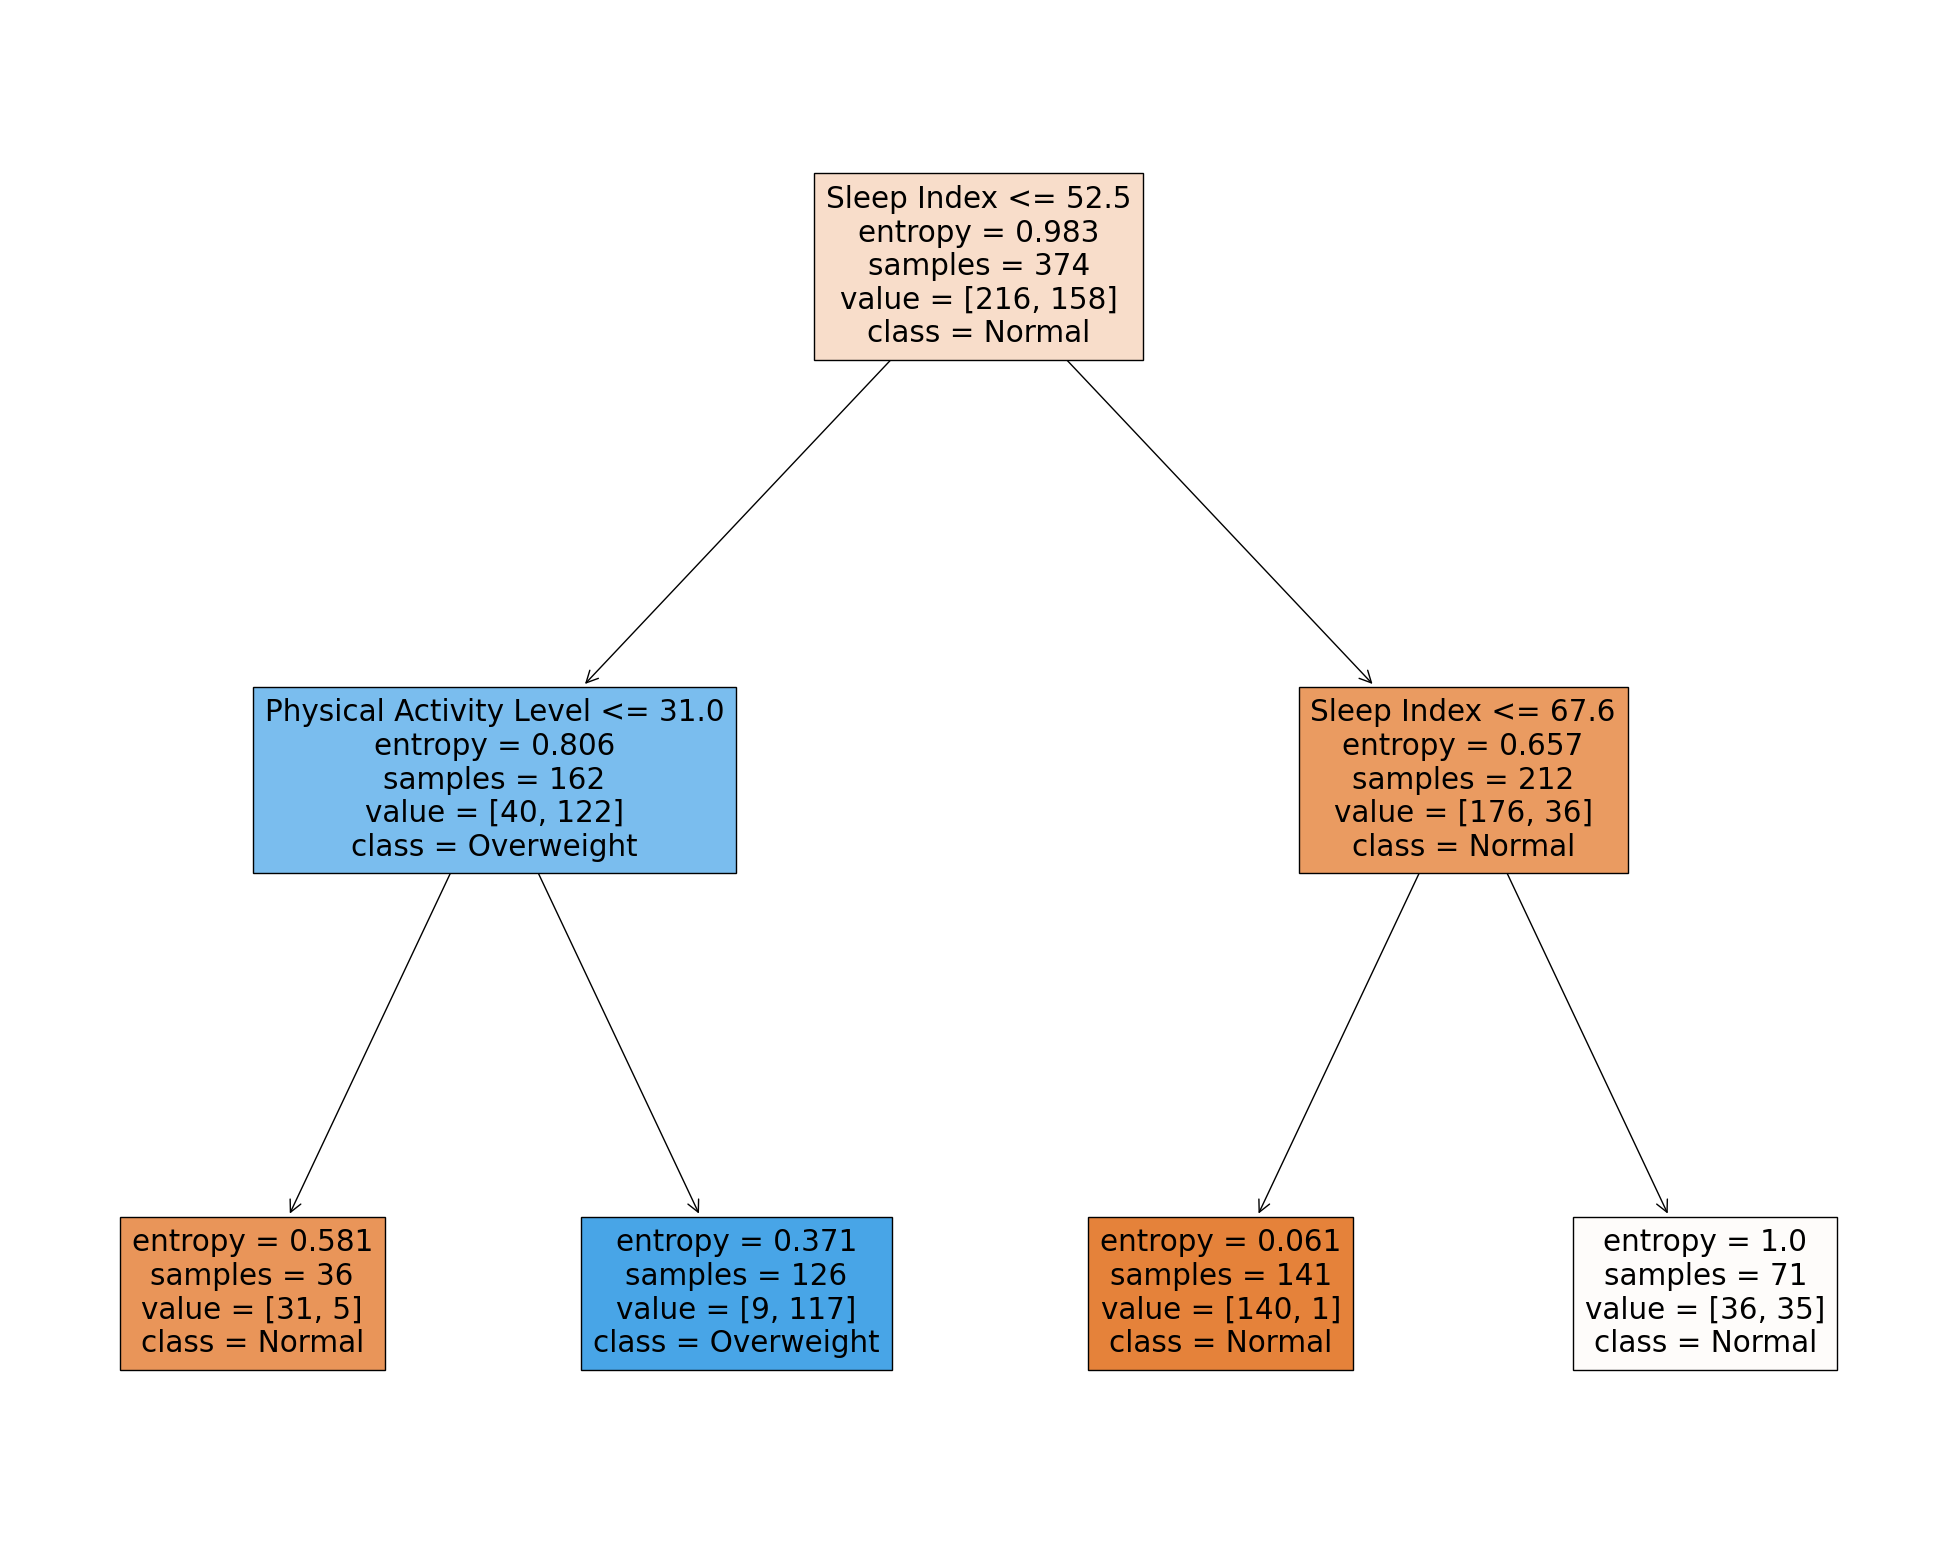

In [16]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2)        
clf = clf.fit(x, y)  

feature_names = ['Sleep Index','Physical Activity Level','Stress Level','Daily Steps',]
class_names = ["Normal", "Overweight"]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

# Fitting graph

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x

,Sleep Index,Physical Activity Level,Stress Level,Daily Steps
0,36.6,42,6,4200
1,37.2,60,8,10000
2,37.2,60,8,10000
3,23.6,30,8,3000
4,23.6,30,8,3000
...,...,...,...,...
369,72.9,75,3,7000
370,72.0,75,3,7000
371,72.9,75,3,7000
372,72.9,75,3,7000


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=25)

In [20]:
train_scores = ['']*20
test_scores = ['']*20

for i in range(0, 20):
    dt = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = i+1)
    dt = dt.fit(x_train, y_train)
    train_scores[i] = dt.score(x_train, y_train)
    test_scores[i] = dt.score(x_test, y_test)

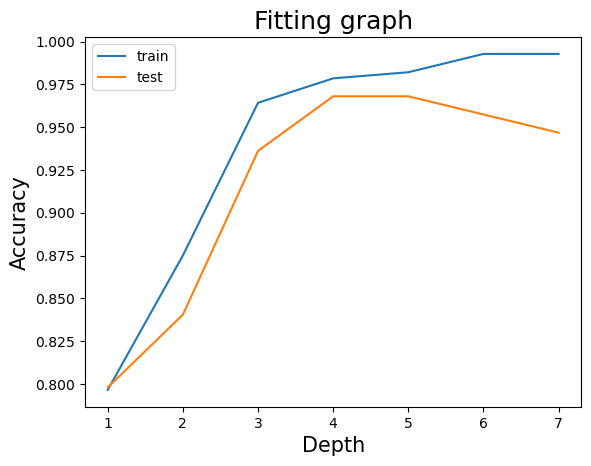

In [21]:
x = [i for i in range(1,8)]

plt.plot(x,train_scores[:7], label = 'train')
plt.plot(x,test_scores[:7], label = 'test')
plt.title('Fitting graph', fontsize=18)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Depth', fontsize=15)
plt.legend()
plt.show()

# confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

best_dt = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
best_dt = best_dt.fit(x_train, y_train)

y_pred = best_dt.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

In [23]:
y_test['N BMI Category'].value_counts()

Normal        49
Overweight    45
Name: N BMI Category, dtype: int64

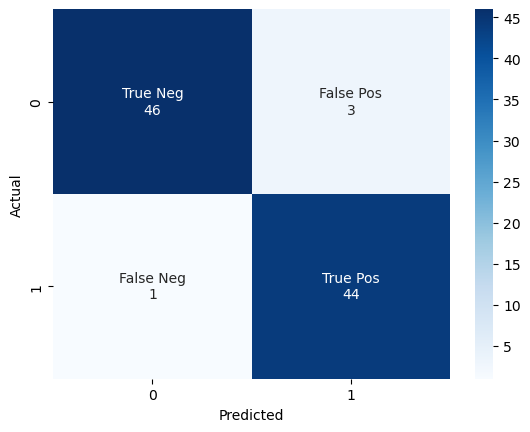

In [24]:
import numpy as np

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Accuracy:  ', round(accuracy_score(y_test, y_pred), 2))
print('Precision: ', round(precision_score(y_test, y_pred, pos_label='Overweight'),2))
print('Recall:    ', round(recall_score(y_test, y_pred, pos_label='Overweight'),2))
print('F1_score:  ', round(f1_score(y_test, y_pred, pos_label='Overweight'),2))

Accuracy:   0.96
Precision:  0.94
Recall:     0.98
F1_score:   0.96
